<a href="https://colab.research.google.com/github/kingseo4567/maritime-data-minig/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-b5fb77bfa7ed>:45: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inpu

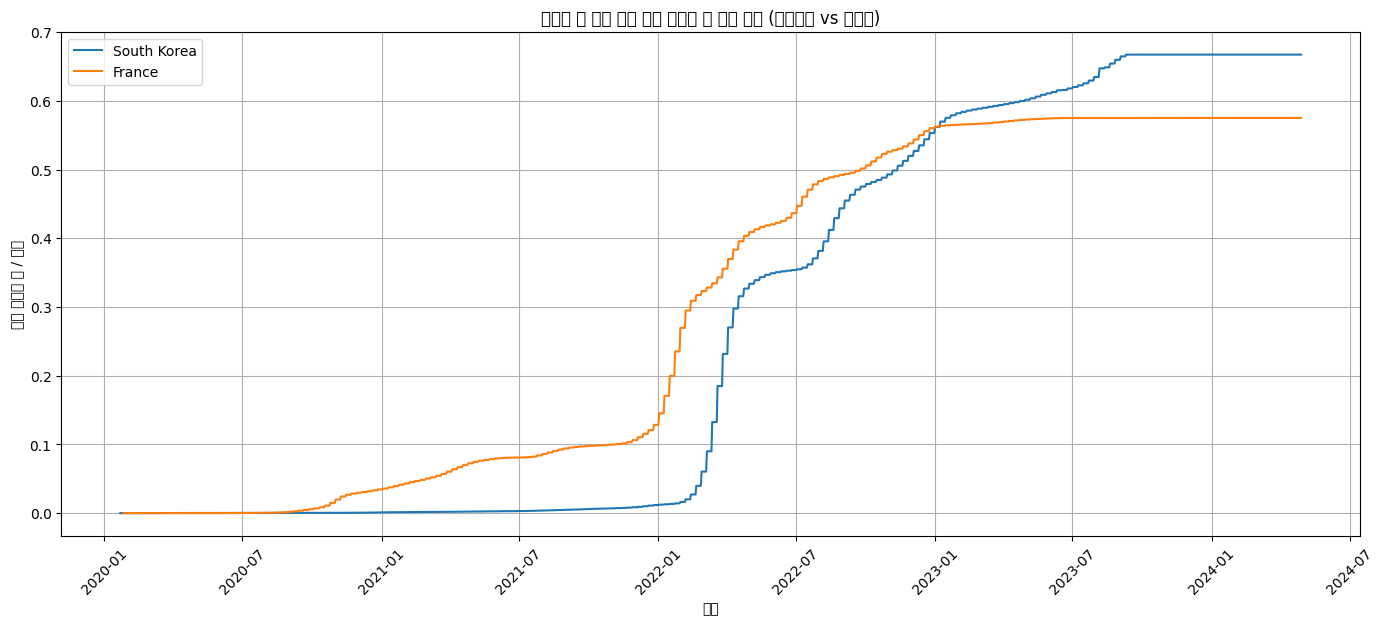

In [7]:
#10주차 과제

import pandas as pd
import matplotlib.pyplot as plt
import zipfile

zip_path = '/content/owid-covid-data.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    csv_file = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
    with zip_ref.open(csv_file) as file:
        df = pd.read_csv(file)

# 날짜 타입 변환
df['date'] = pd.to_datetime(df['date'])

# 대한민국과 프랑스 데이터 추출
df_kor = df[df['location'] == 'South Korea'].copy()
df_fra = df[df['location'] == 'France'].copy()

# 인구 대비 누적 확진자 비율 계산
df_kor['cases_per_pop'] = df_kor['total_cases'] / df_kor['population']
df_fra['cases_per_pop'] = df_fra['total_cases'] / df_fra['population']

# 병합
df_compare = pd.merge(
    df_kor[['date', 'cases_per_pop']],
    df_fra[['date', 'cases_per_pop']],
    on='date',
    suffixes=('_kor', '_fra')
)

# 2020년 1월 22일 이후만 추출
df_compare = df_compare[df_compare['date'] >= '2020-01-22']

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(df_compare['date'], df_compare['cases_per_pop_kor'], label='South Korea')
plt.plot(df_compare['date'], df_compare['cases_per_pop_fra'], label='France')
plt.title('일자별 총 인구 대비 누적 확진자 수 비율 추이 (대한민국 vs 프랑스)')
plt.xlabel('날짜')
plt.ylabel('누적 확진자 수 / 인구')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()